<a href="https://colab.research.google.com/github/proditorIF/Derma_sense_HackAi/blob/main/codes/Derma_sense_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**miricalderonr/vit-derma-sense** es el modelo preentrenado por nosotros usando el dataset de Kaggle *Skin Cancer: Malignant vs. Benign* que se encuentra ahora en la nube

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoImageProcessor, ViTForImageClassification
import torch
from PIL import Image

Para revisar el estado de una imagen llama a la función dermaSense y pasa la imagen para su revisión.

In [ ]:
def dermaSense(image):
  image_processor = AutoImageProcessor.from_pretrained("miricalderonr/vit-derma-sense")
  model = ViTForImageClassification.from_pretrained("miricalderonr/vit-derma-sense")

  inputs = image_processor(image, return_tensors="pt")

  with torch.no_grad():
      logits = model(**inputs).logits

  # model predicts one of the 1000 ImageNet classes
  predicted_label = logits.argmax(-1).item()

  if model.config.id2label[predicted_label] == "malignant":
    return print("Se detectó un posible melanona, te recomendamos asisitir a un médico especialista")

  if model.config.id2label[predicted_label] == "ben":
    return print("Parece ser benigno")

Caso ejemplo. Imagen clasificada maligna

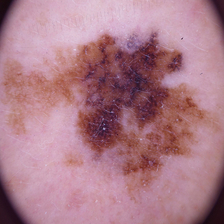

Se detectó un posible melanona, te recomendamos asisitir a un médico especialista


In [ ]:
image_path = "/content/1443.jpg"
image = Image.open(image_path)

display(image)

dermaSense(image)

Caso ejemplo. Imagen clasificada benigna

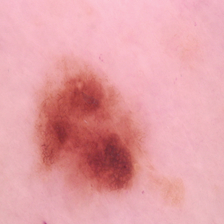

Parece ser benigno


In [ ]:
image_path = "/content/1756.jpg"
image = Image.open(image_path)

display(image)

dermaSense(image)

Prueba extra

In [ ]:
image_path = ""
image = Image.open(image_path)

display(image)

dermaSense(image)